In [1]:
from typing import Annotated, List, Dict, Any
from typing_extensions import TypedDict
from langgraph.graph import START, END, StateGraph
from langgraph.graph.message import add_messages
from langchain_core.messages import HumanMessage, AIMessage

In [4]:
class State(TypedDict):
    messages: Annotated[List, add_messages]

In [6]:
def greet(state: State) -> Dict[str, Any]:
    messages = state['messages']
    response = "Hello!, How are you?"
    return {'messages': [AIMessage(content=response)]}

In [7]:
def ask_name(state: State) -> Dict[str, Any]:
    messages = state['messages']
    response = "What is your Name?"
    return {'messages': [AIMessage(content=response)]}

In [8]:
def farewell_node(state: State) -> Dict[str, Any]:
    messages = state['messages']
    response = "Bye Take Care!"
    return {'messages': [AIMessage(content=response)]}

In [9]:
graph = StateGraph(State)

graph.add_node('greet_node', greet)
graph.add_node('ask_name_node', ask_name)
graph.add_node('farewell_node', farewell_node)

graph.add_edge(START, 'greet_node')
graph.add_edge('greet_node', 'ask_name_node')
graph.add_edge('ask_name_node', 'farewell_node')
graph.add_edge('farewell_node', END)

app = graph.compile()

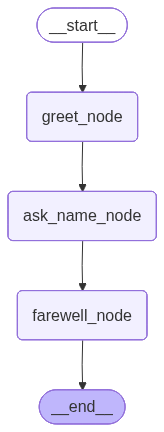

In [10]:
from IPython.display import Image, display

try:
    display(Image(app.get_graph().draw_mermaid_png()))
except Exception as e:
    print(e)

In [11]:
def test(user_input):
    state: State = {
        "messages": [HumanMessage(content=user_input)],
    }
    state = app.invoke(state)
    print("\n--- Response 1 ---")
    for m in state["messages"]:
        print(m.__class__.__name__, ":", m.content)

In [12]:
test('Hi')


--- Response 1 ---
HumanMessage : Hi
AIMessage : Hello!, How are you?
AIMessage : What is your Name?
AIMessage : Bye Take Care!
